<img align="center" width="12%" style="padding-right:10px;" src="../Images/Ccom.png">

# Lab A, Step 1: File Parsing and Plotting

In [2]:
%load_ext autoreload
%autoreload 2

import sys
import os
import numpy as np

sys.path.append(os.getcwd())  # add the current folder to the list of paths where Python looks for modules 

In this Notebook you will further develop classes for handling various ocean mapping data by adding a read and a draw method. 

To refresh your memory on reading **text files** please refer to the ePOM *Programming Basics with Python for Ocean Mapping* [Read and Write Text Files](../../python_basics/006_Read_and_Write_Text_Files.ipynb) notebook. Similarly for help with **classes** use the [A class as a Data Container](../../python_basics/008_A_Class_as_a_Data_Container.ipynb) notebook.

Progressing through this notebook You will create the class definitions and keep adding **code** to it. Each class definition will be contained in a single code cell in a notebook that has the same name as the class. 

___

### 1.0 Importing the matplotlib and numpy Modules

There are many plotting libraries available for Python. One of the most commonly used ones is the `Matplotlib` library. We will use the `matplotlib.pyplot` module for most of our plotting.

The first step to be able to plot our data is to import the matplotlib.pyplot module. To indicate where the functionality comes from we will import the module as `plt` which has as a result that all functions contained within can be called with the prefix `plt.`

To import the matplotlib pyplot module add the line import *import matplotlib.pyplot as plt* at the top of all the class files you have created so-far (if it is not already there).

Another common library recommended for use is numpy. Numpy contains math functions and is usually imported as np, in that case if you want to call the sin() contained in numpy with the argument a you would use `np.sin(a)`. Particularly for linear algebra this can lead to confusing code so in our case we will load the math functions in directly. 

In the example below you will see examples showing the import functionality from a library:


In [3]:
import numpy as np  # Imports everything contained in numpy into np. 
                    # To access the functions we have to use the prefix'np'

a = 30*np.pi/180
b = np.sin(a)
print(b)

# imports just the sin and cos functions from numpy, make them directly available
# The advantage is that this produces less cumbersome to read code
# The disadvantage is that this overrides the default behavior of sin, cos and pi
    # In general this is frowned upon, but in the case where we have complicated models the 
    # resulting code is a lot cleaner
from numpy import sin, cos, pi

a = 30*pi/180
b = sin(a)
print(b)

0.49999999999999994
0.49999999999999994


<img align="left" width="6%" style="padding-right:10px;" src="../Images/info.png">


The example shown above does not conform to the PEP-8 standard, normally all the import statements should precede any code.

To import the numpy functionality add the following two lines to the top of all your class definition files<br>

        from numpy import pi, cos, sin, log, exp
        import numpy as np

## 1.1 Time Series Data Class File Parser


---
### 1.1.1 Method Definition

In the code cell below you see a method added to the `WaterLevel` `class`, this method provides the ability to parse a data file. Copy the code for the `read_jhc_file` method and add it to your `Waterlevel` class definition in the file waterlevel.py


In [4]:
import os.path
from datetime import datetime, timezone

class WaterLevel:
    """A Class for Water Level Data"""

    def __init__(self):

        ...

    # The I/O methods:
            
            
    def read_jhc_file(self, fullpath):

        # Check the File's existence
        if os.path.exists(fullpath):
            self.metadata["Source File"] = fullpath
            print('Opening water level data file:' + fullpath)
        else:  # Raise a meaningful error
            raise RuntimeError('Unable to locate the input file' + fullpath)

        # Open, read and close the file
        wl_file = open(fullpath)
        wl_content = wl_file.read()
        wl_file.close

        # Tokenize the contents
        wl_lines = wl_content.splitlines()
        count = 0  # initialize the counter for the number of rows read
        for wl_line in wl_lines:
            observations = wl_line.split()  # Tokenize the string
            epoch=datetime.fromtimestamp(float(observations[5]), timezone.utc)
            self.times.append(epoch)
            self.water_levels.append(float(observations[6]))
            count += 1

___

So what happens here?

    def read_jhc_file(self, fullpath):
    
The line defines a method named **read_jhc_file** for the class **WaterLevel**. It takes the arguments *self*, a reference to the object of the class itself, and *fullpath* which we expect to contain a `string` holding the full path and file name of file containing water level data.

    # Check the File's existence
    if os.path.exists(fullpath):
        print('Opening water level data file:' + fullpath)
    else:  # Raise a meaningful error
        raise RuntimeError('Unable to locate the input file' + fullpath)*

These lines ensure that a file exists at the location provided by *fullpath*, if one does not exist a meaningful error message will be produced. The amount of checking that you do will depend on the purpose of the code. In the case of this class where we are creating some development code we will do relatively little checking leading to code that is not overly robust. Commercial software developers will need to produce code that is very robust i.e., they need to spend a lot of time evaluating the validity of the arguments passed to methods.

    # Open, read and close the file
    wl_file = open(fullpath)
    wl_content = wl_file.read()
    wl_file.close
    
In these lines a `file` located at *fullpath* is opened. The variable *wl_file* references this file. Again, this could be a location where we test the validity of the file to make the code more robust, but we will not do so. We read the contents of the file into the variable *wl_content*. It should be pointed out here that the data is contained in a **text** or **ASCII** file and that the variable will be of type `str`. After we have read the file all the contents are stored in *wl_content* and we may close the file.

The contents of the file looked as follows

        2011 124 03 30 00.00 1304479800.000 0.137
        2011 124 03 36 00.00 1304480160.000 0.137
        2011 124 03 42 00.00 1304480520.000 0.127
        2011 124 03 48 00.00 1304480880.000 0.137
        2011 124 03 54 00.00 1304481240.000 0.127
        2011 124 04 00 00.00 1304481600.000 0.127
        2011 124 04 06 00.00 1304481960.000 0.117
        2011 124 04 12 00.00 1304482320.000 0.127
        
That is: the first columns represent the year, day number, hour, minute, second, POSIX time and water level respectively; each row represents a single record. Therefore, it makes sense to parse the file on record by record i.e., line by line basis. However, the variable wl_content holds the contents of the file in a single string; let's break up the file contents into lines i.e., records:        

    # Tokenize the contents
    wl_lines = wl_content.splitlines()
    
After this the records are now contained as strings in the `list` wl_lines. This helps as we can now address each record individually. However, each record is still represented by a single string.
    
    count = 0  # initialize the counter for the number of rows read
    for wl_line in wl_lines:
        observations = wl_line.split()  # Tokenize the string
        epoch=datetime.fromtimestamp(float(observations[5]), timezone.utc)
        self.times.append(epoch)
        self.water_levels.append(float(observations[6]))
        count += 1

The code above breaks the strings into tokens, that is those parts of the string that are separated by a space character. After this the 6th column value is converted to an epoch by using:  
    
    datetime.fromtimestamp(float(observations[5]), timezone.utc)
    
Once this the epoch, that now conforms to the UTC time standard, is added to the list times variable times which is a member of the class. Finally:

    self.water_levels.append(float(observations[6]))
   
Adds the water level for the record to the list **self.water_levels**. If we assume that the every record in the file is populated correctly then the result will be that the class now how a list of times with a corresponding list of water levels. 



<img align="left" width="6%" style="padding-right:10px;" src="../Images/test.png">

On the Lab_A channel on Teams post a message in which you describe in your words what the result is from the line below:
    
    datetime.fromtimestamp(float(observations[5]), timezone.utc)
    
In your discussion explain what POSIX time is and why you think there is a benefit in using it over the other time representation used in the data file.
    
    
<img align="left" width="6%" style="padding-right:10px;" src="../Images/test.png">

Also on Teams, discuss whether you think that having two separate lists for the water levels and times is better/worse/indifferent than using a single `numpy` array with the rows indicating the records and the columns the times and levels respectively.

---
### 1.1.2 Create a Class instance 

In [10]:
from mycode.waterlevel import WaterLevel
abs_path=os.path.abspath(os.path.curdir)+"/Data/"

water_levels = WaterLevel()


    abs_path=os.path.abspath(os.path.curdir)+"/Data/"
    
The code snippet above sets the absolute path to point to the *Data* directory in the current directory 

<img align="left" width="6%" style="padding-right:10px;" src="../Images/test.png">

Also in the code cell above create an instance of the `WaterLevel` class called *water_levels*. For the `metadata` set the datum_type to "geoid" and the datum_name to "EGM08".

In [14]:
water_levels.read_jhc_file(abs_path+"Lab_A_TIDE.txt")

print(water_levels)

Location name          : Unknown
Reference Surface Type : None
Reference Surafce Name : None
Observation Time Basis : UTC
Observations Units     : m
No time data present
No water level data present



In the code cell above a file named **Lab_A_TIDE.txt** is opened and read

---
### 1.1.3 Create a Positioning Class Parser

The following are the contents of the file "Lab_A_GNSS.txt" contained in your Data directory

    2011 128 03 49 11.00 1304826551.000 28.895 145.99753898 15.96038752
    2011 128 03 49 12.00 1304826552.000 29.146 145.99759027 15.96038992
    2011 128 03 49 13.00 1304826553.000 28.980 145.99764598 15.96039290
    2011 128 03 49 14.00 1304826554.000 28.327 145.99770535 15.96039652
    2011 128 03 49 15.00 1304826555.000 27.680 145.99776058 15.96039795
    2011 128 03 49 16.00 1304826556.000 27.839 145.99780667 15.96039632
    2011 128 03 49 17.00 1304826557.000 28.853 145.99784902 15.96039673
    2011 128 03 49 18.00 1304826558.000 29.889 145.99789780 15.96040257
    2011 128 03 49 19.00 1304826559.000 29.833 145.99795750 15.96040920
    
The first columns represent the year, day number, hour, minute, second, POSIX time, orthometric heights, longitudes, and latitudes respectfully.

___
<img align="left" width="6%" style="padding-right:10px;" src="../Images/test.png">

For the Position class create a file parser named **read_jhc_file()** that can parse the file Lab_A_GNSS.txt. Since we are integrating the data based on the time and we used `POSIX` time for the Waterlevel class to determine the epochs, you should be consistent and do the same for the positioning data.

In [12]:
from mycode.position import Position

# positions
pos = Position()
print("The object type is %s" % (type(pos)))

positions = Position()
positions.read_jhc_file(abs_path+"Lab_A_GNSS.txt")
positions.times

The object type is <class 'mycode.position.Position'>


[]

---
### 1.1.3 Parsers for Motion, TWTT and SSP data

We have saved you some work by creating classes with parsers for the Motion, Two Way Travel Time, and sound speed data. As you will see these are very similar in nature to the classes that you created yourself (or are they?).

In [21]:
from mycode.EchosounderData import EchosounderData
from mycode.Motion import Motion
from mycode.SSP import SSP

# Instantiate a Motion object and read data into it 

motions=Motion()
motions.read_jhc_file(abs_path+'/Lab_A_MRU.txt')

# Instantiate a TWTT object and read data into it 

twtts=EchosounderData()
twtts.read_jhc_file(abs_path+'/Lab_A_TWTT.txt')

# Instantiate a SVP object and read data into it 

svp=SSP()
svp.read_jhc_file(abs_path+'/Lab_A_SVP.txt')

Opening motion data file:/home/jupyter-semmed/ESCI_OE_774_874_Clean/Lab_A/Data//Lab_A_MRU.txt
Opening Two Way Travel Time (TWTT) data file:/home/jupyter-semmed/ESCI_OE_774_874_Clean/Lab_A/Data//Lab_A_TWTT.txt
Opening sound speed profile data file:/home/jupyter-semmed/ESCI_OE_774_874_Clean/Lab_A/Data//Lab_A_SVP.txt


___
<img align="left" width="6%" style="padding-right:10px;" src="../Images/test.png">

The sound speed profile data file is fundamentally different in structure from the other data provided here. On Teams discuss how this is so, or if you do agree, build an argument for it being similar in nature. Make sure that you use the words 'time' and 'event' in your note!

---
## 1.2 Adding Draw methods to the classes



## 1.2.0 Add the draw method to the WaterLevel class

Add the draw method to the WaterLevel class. This function should take the argument self and when called should print the line "Drawing Water Level Data".

Drawing Water Level Data


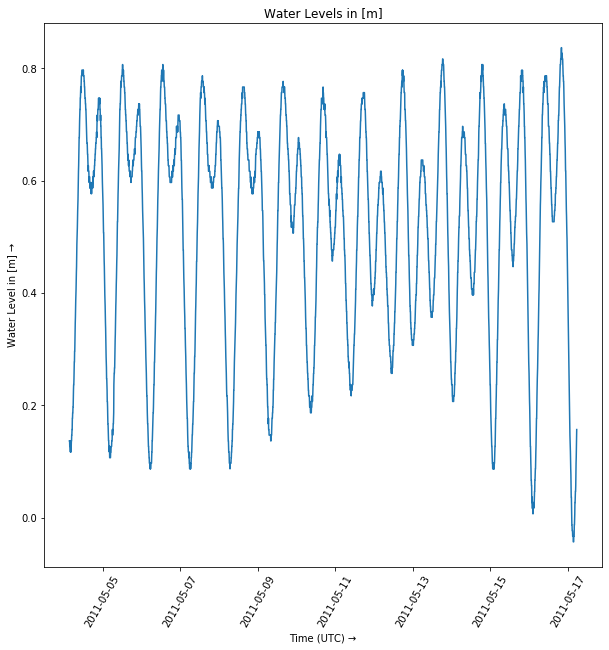

In [23]:
water_levels.draw()

### 1.2.2 Defining the plot area

The Matplotlib provides the figure module which allows you to control the properties of plots. In our case we want to show the plot at a defined size in inches. We can accomplish this by setting the figsize attribute of figure, in our case we want to define a drawing area with a width and height of 10.

To achieve this add the following line at the bottom of the `draw` method.:
    
    plt.figure(figsize=(10, 10))
    
Add the `plt.plot()` method to plot the times on the horizontal axis and the water levels on the vertical axis.


#### 1.2.2.0 Adding A Title and Labels

The data shown in the plot may look interesting, but is meaningless to anyone not familiar with the data. To clearly convey what is shown an appropriate title, subtitles and labels are required!

#### 1.2.2.1 Plot the title

To plot a title use the function plt.title(). The title should be *Water Level Data*. Add a call to this function below the call to plt.plot() 

#### 1.2.2.2 Plot the vertical axis label

To plot a y-axis label use the function plt.ylabel(). The label should be 'Water Level in [m] above Chart Datum →. Add a call to this function below the call to plt.plot() 

#### 1.2.2.3 Plot the Horizontal axis label

We want to plot the time label as, in this case 'Time (time_basis) →' where the time_basis is the metadata dictionary value, so in this case *Time (UTC) → - Make sure to get the time base from the meta-data don't just type (UTC)!

#### 1.2.2.4  Rotate the tick labels

If you executed the function you will have noticed that the labels on the x-axis are overlapping. You can rotate them by using the plt.xticks() function. Use the Matplotlib documentation to find out how to rotate the labels by 60 degrees.

___
<img align="left" width="6%" style="padding-right:10px;" src="../Images/test.png">

On Teams discuss what your preferred method for avoiding overlapping labels is. If you think this is a better approach then use that method instead of what was prescribed in step 1.2.2.4

___ 
Re-execute the code cell associated to step 1.2.0 - what happened?


### 1.3.0 Plot the Motion Data

In this case we want to plot the data contained in the Motion class object motions. This object holds a list of times with for each epoch a yaw, roll, pitch and heave value. It is often useful to plot all four time series together with the same time basis. In this section we will create draw method that creates such a plot. Note that all the plots should share the same horizontal axis scaling, but that the vertical axis scaling is should be data dependent.

 Add the `draw` method to the `Motion` class. This function should take the argument `self` and when called should print the line "Drawing Motion Data".
 


Drawing Motion Data


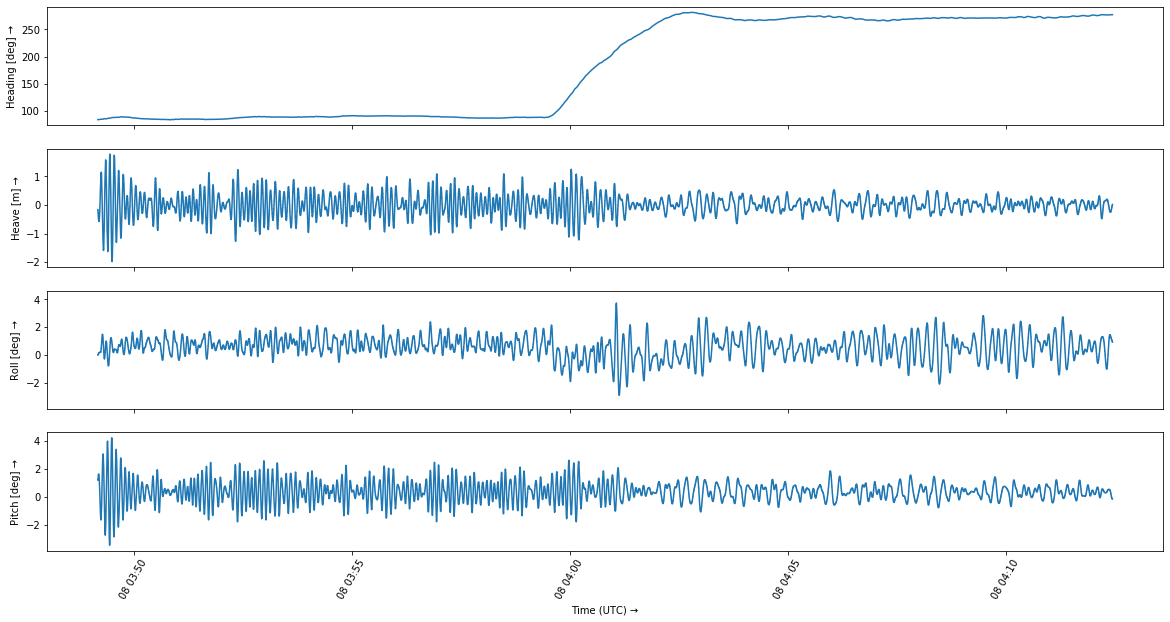

In [26]:
motions.draw()

### 1.3.1 Defining the plot area

For this figure we want to plot 4 time series above each-other. To provide sufficient space we want the size to be twice as high as it is wide. To achieve this add the line plt.figure(figsize=(20, 10)) at the bottom of the draw method.


### 1.3.2 Adding the subplots

To allows us to create 4 plots in the figure we can use the matplotlib subplot method. In this exercise you will cal the subplot function with three integers describing the position of the subplot. It is perhaps easiest understood by looking at the example in the code cell below:

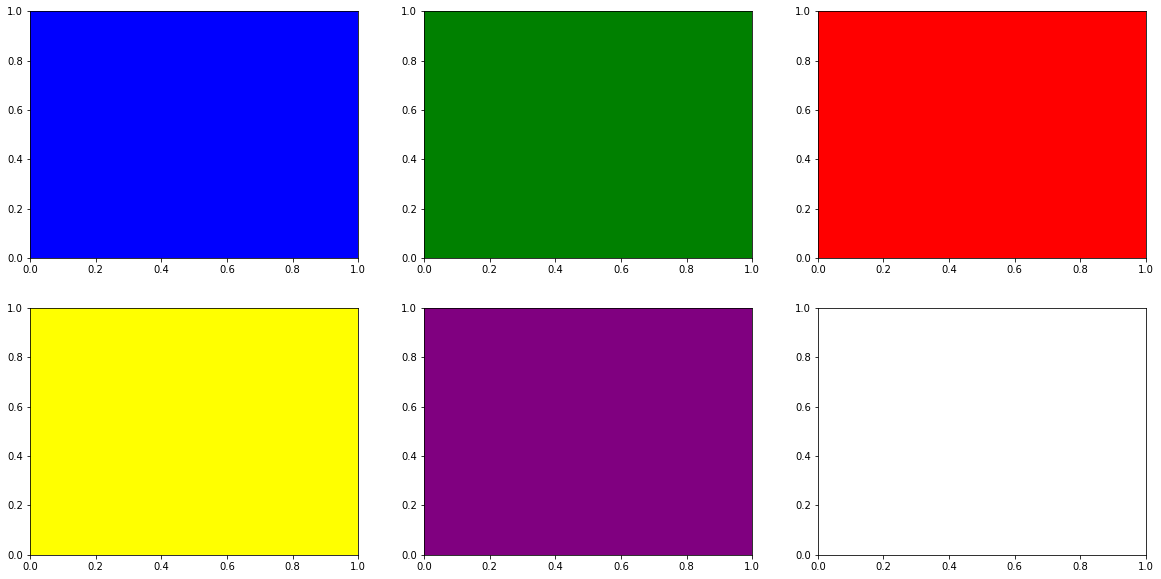

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
ax1=plt.subplot(2,3,1,facecolor="blue")
ax2=plt.subplot(2,3,2,facecolor="green", sharex=ax1)
ax3=plt.subplot(2,3,3,facecolor="red")
ax4=plt.subplot(2,3,4,facecolor="yellow", sharey=ax3)
ax5=plt.subplot(2,3,5,facecolor="purple")
ax6=plt.subplot(2,3,6)

As you can see there are 2 rows and 3 columns of plots, these are defined by the arguments 2 and 3 in the call to subplot(). The third argument is the index of each plot in the array, index starts at 1 (not zero!) in the top row corner and increases to the right. Once the end of a row is reached the index of the first plot on the next row is the last index of the previous row plus one. In this example the index of the blue plot is 1, the green plot 2, the red plot 3, the yellow plot 4, the purple plot 5, and, finally, the white plot 6.

Confusingly the index of the subplots *starts at 1 rather than 0*, which is inconsistent with most Python indexing. This is because `Matplotlib` acts consistently with the `Matlab` plotting functionality. Matlab starts indexing at 1 rather than 0

It is possible to share the x or y limits and scaling of an axis between the plots. In the code example above plot ax2 shares it's x-axis with the plot ax1 and the plot ax4 shares its y-axis with plot ax3.

Add code to the bottom of the draw method that creates 4 by 1 array of subplots. Call the subplot at index 1 ax1, the subplot at index 2 ax2, etc. All the plots should be white. All plots should share the axis of ax1 and the plot ax4 should share it's y-axis with ax3.


___
### 1.3.3 Adding the data

We will plot each time series in an appropriate cell

#### 1.3.3.0 Plot the yaw data

We want to plot the yaw data in the plot defined by ax1. Add the line `plt.plot(self.times, np.degrees(self.yaw)) ` below the assignment of the first subplot to ax1.

You may wonder what the np.degrees() function does; it simply converts angles in radians to angles in degrees.

Add the y-axis label 'Heading [deg] →'.


#### 1.3.3.1 Plot the heave data

We want to plot the heave data in the plot defined by ax2. Add the line plt.plot(self.times, self.heave) below the assignment of the first subplot to ax2. We also want to share the x-axis limits of the plot with that 

Add the y-axis label 'Heave [m]' →.

#### 1.3.3.2 Plot the roll data

Plot the roll in **degrees** in ax3 and add the y-axis label 'Roll [deg]' →.

#### 1.3.3.3 Plot the pitch data

Plot the pitch in **degrees** in ax4 and add the y-axis label 'Pitch [deg]' →.

___
### 1.3.4 Plot and rotate tick labels, plot the x-axis labels

For the x-axis we want to plot the time label for ax4 in the same fashion as you did for the water_levels

___
### 1.3.5 Hide Tick Labels

The figure gets unnecessarily cluttered If for each subplot you plot the x-axis tick labels. You may suppress plotting them for ax1 by adding the line plt.setp(ax2.get_xticklabels(), visible=False) to the bottom of the draw method. You should also add code to suppress printing of the labels for the ax2 and ax3 objects.

___
## Step 1.3 Recap

You are now done plotting the motion data. By plotting the 4 time series below each-other you allow easier interpretation of the data. For example: just before 08:04:00 there appears to be change in the behavior of the pitch data, this change is easily understood by the fact that the vessel changed heading at that time.

___
## 1.4 Plot the TWTT Data

We want to plot the data contained in the `TwoWayTravelTime` class object `twtts`. This object holds a list of times with for each time a Two Way Travel Time (TWTT). TWTT are the prime observable of sonar systems designed to map bathymetry. 

___
### 1.4.1 Add the `draw` method to the `TwoWayTravelTime` class

 Add the `draw` method to the `TwoWayTravelTime` class This function should take the argument `self` and when called should print the line "Drawing GNSS Data".
 
The draw method should plot the two way travel times similarly to the water level data from step 2.1 in a figure of size 10x10 inches. The times should be plotted along the x-axis, and the associated twtts along the y-axis. The title should be 'Two Way Travel Times in [s]' and the y-label should be 'TWTT in [s] →'. Finally the x-axis tick labels should be shown in a manner similar to that used in step 2.1.

Drawing TWTT Data


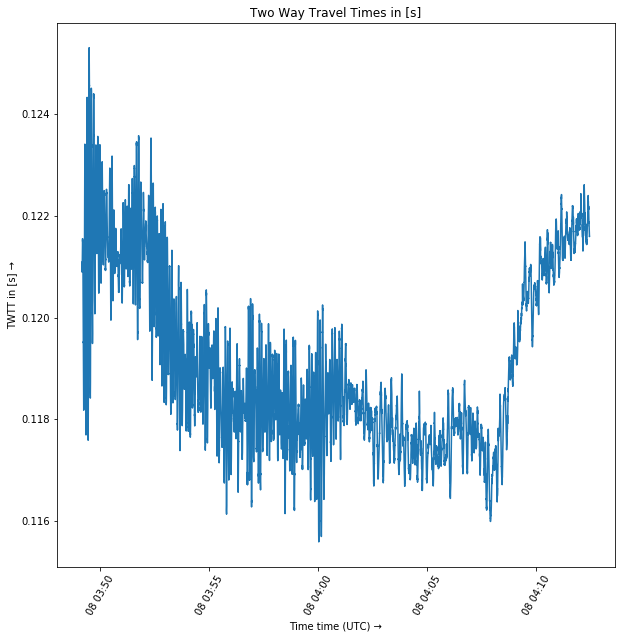

In [29]:
twtts.draw()

___
## Step 1.4 Recap

Looking at the plot you will notice that the data shows a trend with, what appears to be, a lot of noise superimposed. This makes sense as the TWTT is a proxy to the distance from the sonar transducer to the sea floor. That distance is affected by location and motion of the vessel, as well as the water level and sound speed. If we observe the factors affecting the observations we can correct for them and remove the majority of the apparent noise.

This process is the integration of the sensor data and is really what the whole course is about!


<img align="left" width="5%" style="padding-right:10px;" src="../../python_basics/images/email.png">

*For issues or suggestions related to this notebook, write to: epom@ccom.unh.edu*